## Discretisation is the process of transforming continuous variables into discrete variables by creating a set of contiguous intervals that span the range of variable values.

# There are two common Techniques for Numerical Encoding

* ## 1 Discretization / Binning
* ## 2 Binarization

## In applied mathematics, discretization is the process of transferring continuous functions, models, variables, and equations into discrete counterparts.

# Use of Discretization

* ## To Handle Outliers
* ## To Improve the value spread

# Types of Discretization
* # Unsupervised
    * ## Three Types Of Unsupervised Discretization
        * ### Equal Width / Uniform
        * ### Equal Frequency / Quantile
        * ### K-Means
        <br>
* # Supervised
    * ## Only One Type of Supervised Discretization
        * ### Decision Tree 
* # Custom
<br>

# Syntax :

### KBinsDiscretizer(n_bins,strategy,encode)

### strategy = uniform / quantile / kmean
### encode = ordinal (used when the data are orderd ) / onehot ( when the the are not orderd)

# Unsupervised Discretization

## Equal Width / Uniform

# Uniform: Each bin has the same width in the span of possible values for the variable.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer

from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import KBinsDiscretizer


In [2]:
data = {
    "Age":[80,15,15,13,28,35,40,45,50,55,20]
}
data = pd.DataFrame(data)
data

,Age
0,80
1,15
2,15
3,13
4,28
5,35
6,40
7,45
8,50
9,55


# Apply Equal Width / Uniform

In [3]:
kbin_age = KBinsDiscretizer(n_bins=3,strategy='uniform',encode="ordinal")

# Use ColumnTransformer

In [4]:
trf = ColumnTransformer(
[
    
    ("age",kbin_age,[0]),
]

)

In [5]:
new_data = trf.fit_transform(data)
new_data

array([[2.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.]])

# Check Transform

In [6]:
trf.named_transformers_


{'age': KBinsDiscretizer(encode='ordinal', n_bins=3, strategy='uniform')}

# Check Bins

In [7]:
trf.named_transformers_["age"].n_bins_

array([3])

# Check Edges range

In [8]:
trf.named_transformers_["age"].bin_edges_

array([array([13.        , 35.33333333, 57.66666667, 80.        ])],
      dtype=object)

In [9]:
output = pd.DataFrame({
    "age":data["Age"],
    "age_trf":new_data[:,0],
})
output

,age,age_trf
0,80,2.0
1,15,0.0
2,15,0.0
3,13,0.0
4,28,0.0
5,35,0.0
6,40,1.0
7,45,1.0
8,50,1.0
9,55,1.0


# Attach Labels

In [10]:
output["age_labels"] = pd.cut(data["Age"],trf.named_transformers_["age"].bin_edges_[0].tolist())
output

,age,age_trf,age_labels
0,80,2.0,"(57.667, 80.0]"
1,15,0.0,"(13.0, 35.333]"
2,15,0.0,"(13.0, 35.333]"
3,13,0.0,NaN
4,28,0.0,"(13.0, 35.333]"
5,35,0.0,"(13.0, 35.333]"
6,40,1.0,"(35.333, 57.667]"
7,45,1.0,"(35.333, 57.667]"
8,50,1.0,"(35.333, 57.667]"
9,55,1.0,"(35.333, 57.667]"


# Formulae
## ( Max - Min ) / Bins = Ans

## e.g Max = 80 , Min = 13 , Bins = 3

## (80-13)/3 = 22

## 13 + 22 = 35  (13,35)
## 35 + 22 = 57 (35,57)
## 57 + 22 = 79 (57,79+1)


# Graph

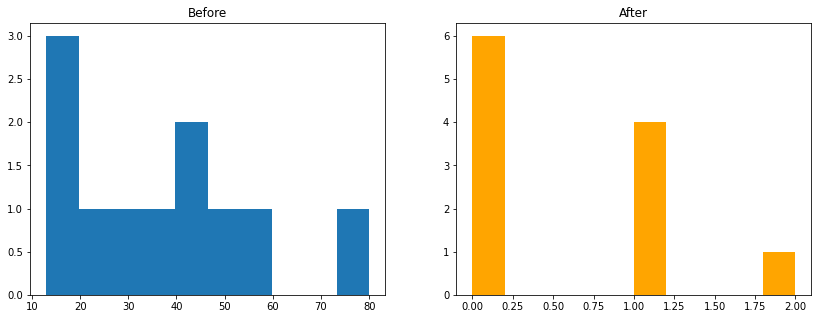

In [11]:
plt.figure(figsize=(14,5))
plt.subplot(121)
plt.hist(data["Age"])
plt.title("Before")

plt.subplot(122)
plt.hist(new_data[:,0],color="orange")
plt.title("After")

plt.show()

# Create Function

In [12]:
def discretize(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    
    trf = ColumnTransformer([
        ('first',kbin_age,[0]),
       ])
    
    X_trf = trf.fit_transform(data)
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(data['Age'])
    plt.title("Before Age")

    plt.subplot(122)
    plt.hist(X_trf[:,0],color='orange')
    plt.title("After Age")

    plt.show()
    dss = pd.DataFrame({"Age":data.Age,"Age_Trf":X_trf[:,0]})
    dss["labels"] = pd.cut(data["Age"],trf.named_transformers_['first'].bin_edges_[0].tolist())
    return dss


# Equal Width / Uniform

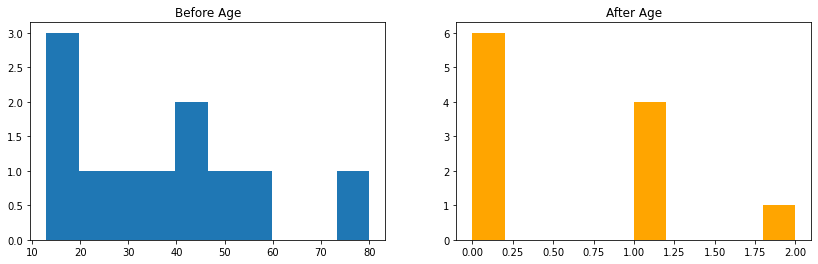

,Age,Age_Trf,labels
0,80,2.0,"(57.667, 80.0]"
1,15,0.0,"(13.0, 35.333]"
2,15,0.0,"(13.0, 35.333]"
3,13,0.0,NaN
4,28,0.0,"(13.0, 35.333]"
5,35,0.0,"(13.0, 35.333]"
6,40,1.0,"(35.333, 57.667]"
7,45,1.0,"(35.333, 57.667]"
8,50,1.0,"(35.333, 57.667]"
9,55,1.0,"(35.333, 57.667]"


In [13]:
discretize(3,"uniform")

# Equal Frequency / Quantile
# Quantile: Each bin has the same number of values, split based on percentiles.

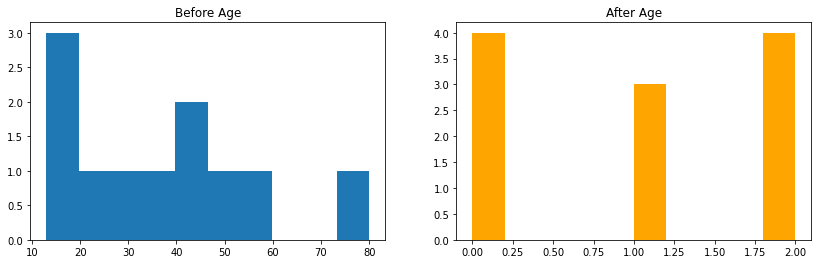

,Age,Age_Trf,labels
0,80,2.0,"(43.333, 80.0]"
1,15,0.0,"(13.0, 22.667]"
2,15,0.0,"(13.0, 22.667]"
3,13,0.0,NaN
4,28,1.0,"(22.667, 43.333]"
5,35,1.0,"(22.667, 43.333]"
6,40,1.0,"(22.667, 43.333]"
7,45,2.0,"(43.333, 80.0]"
8,50,2.0,"(43.333, 80.0]"
9,55,2.0,"(43.333, 80.0]"


In [14]:
discretize(3,"quantile")

# Kmeans

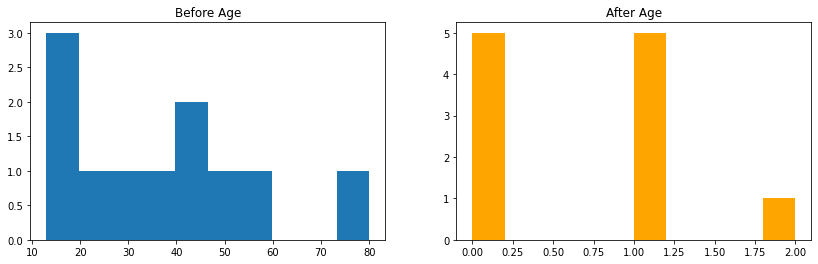

,Age,Age_Trf,labels
0,80,2.0,"(62.5, 80.0]"
1,15,0.0,"(13.0, 31.6]"
2,15,0.0,"(13.0, 31.6]"
3,13,0.0,NaN
4,28,0.0,"(13.0, 31.6]"
5,35,1.0,"(31.6, 62.5]"
6,40,1.0,"(31.6, 62.5]"
7,45,1.0,"(31.6, 62.5]"
8,50,1.0,"(31.6, 62.5]"
9,55,1.0,"(31.6, 62.5]"


In [15]:
discretize(3,"kmeans")

# Working on Dataset

# Create Function

In [16]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])
df.dropna(inplace=True)
X = df.iloc[:,1:]
y = df.iloc[:,0]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [17]:
def discretize(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    
    trf = ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1])
    ])
    
    X_trf = trf.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy')))
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Age'])
    plt.title("Before Age")

    plt.subplot(122)
    plt.hist(X_trf[:,0],color='orange')
    plt.title("After Age")

    plt.show()
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Fare'])
    plt.title("Before Fare")

    plt.subplot(122)
    plt.hist(X_trf[:,1],color='orange')
    plt.title("After Fare")

    plt.show()

# Equal Width / Uniform

0.6330985915492958


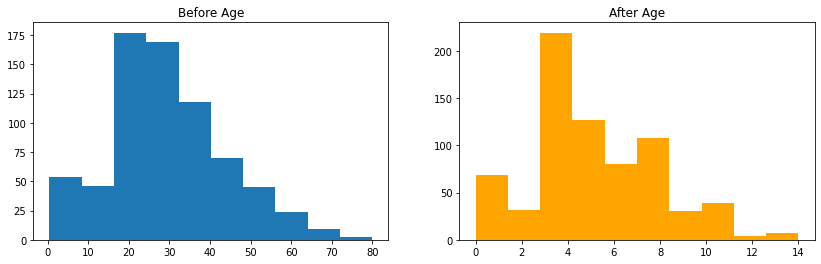

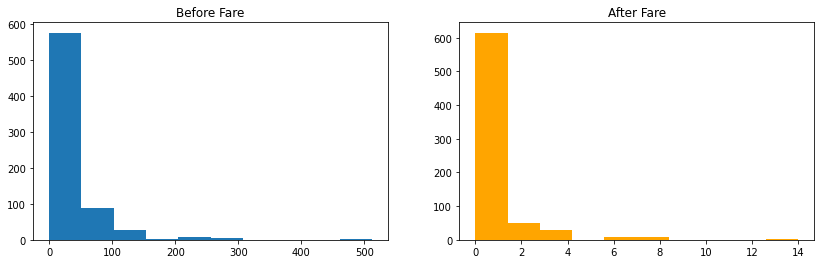

In [18]:
discretize(15,"uniform")

# Equal Frequency / Quantile

## Quantile are most used 

0.630281690140845


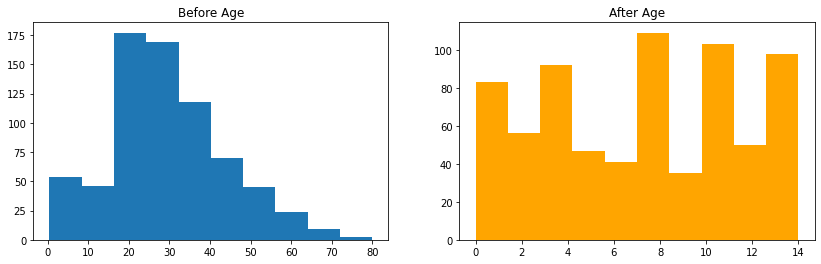

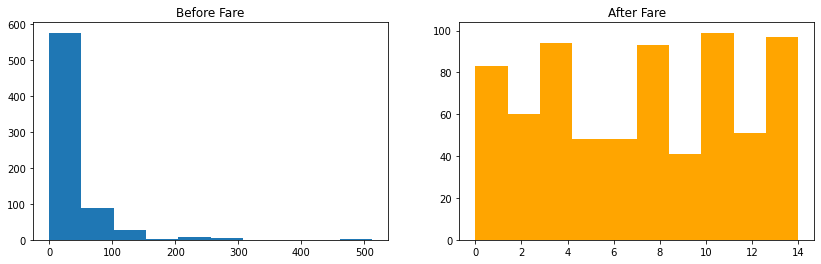

In [19]:
discretize(15,"quantile")

# Kmeans

## K-means only used when the data range are in clusters

0.6358959311424099


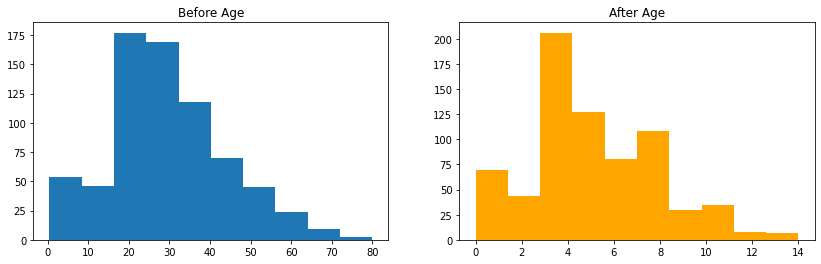

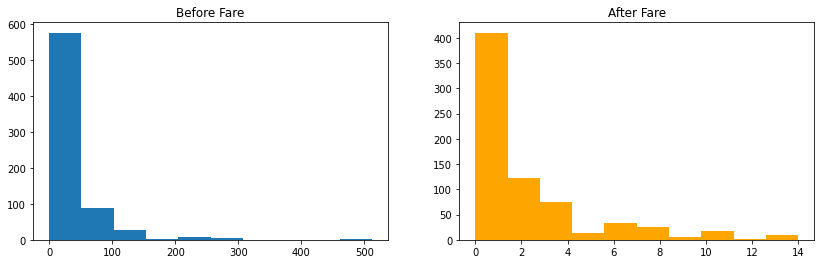

In [20]:
discretize(15,"kmeans")